# Análisis de correspondencia

A menudo descrito como "el análogo categórico de PCA", el análisis de correspondencia es una técnica de reducción de dimensiones que describe la relación y distribución entre dos variables categóricas.

## Intuición

Para empezar, este análisis asume que nuestros datos se preparan como una tabulación cruzada de dos variables categóricas. En la siguiente ilustración, hay $n$ registros, cada uno con dos variables categóricas. Esto conduce a una matriz de tabulación cruzada con todas las `I` variables $V_1$ distintas como filas y las `J` variables distintas $V_2$ como columnas.

<img src="images/ca_data.png" width="600">

Usaremos el conjunto de datos de los premios Nobel, para analizar la distribución de los premios Nobel por categoría y país.

In [2]:
import pandas as pd

df = pd.read_csv('nobel_data.csv', index_col='Country')
df

,Chemistry,Economics,Literature,Medicine,Peace,Physics
Country,,,,,,
Canada,4,3,2,4,1,4
France,8,3,11,12,10,9
Germany,24,1,8,18,5,24
Italy,1,1,6,5,1,5
Japan,6,0,2,3,1,11
Russia,4,3,5,2,3,10
UK,23,6,7,26,11,20
USA,51,43,8,70,19,66


### Probabilidades condicionales

Para entender mejor, la explicación que vendrá posteriormente está profundamente arraigada con la probabilidad condicional. Aquí, la fila, la columna y las sumas totales juegan un papel crucial. Esto nos permite comenzar a expresar probabilidades condicionales, basadas en recuentos generales (para esto, se usa una notación que se resalta a continuación)

<img src="images/ca_probs.png" width="600">

**Hay vínculos (links) e independencia entre las variables cualitativas:**
<img src="images/links_independence.png" width="600">

En última instancia, la mecánica central del análisis de correspondencia es un examen de cuánto se desvían nuestros datos de una suposición de completa independencia. Ésta es una extensión directa de la prueba de chi al cuadrado.

<img src="images/ca_chi_sq.png" width="700">

En el contexto de una tabla de tabulación cruzada, si todas nuestras variables tuvieran independencia, supondríamos que los valores de nuestras filas se distribuirían de forma coherente con la proporción de los totales, y de forma similar para las columnas.

### ¿Cómo hace CA para detectar una desviación de la independencia?

<img src="images/ca_row_profile.png" width="600">

<img src="images/ca_col_profile.png" width="600">

Entonces, podemos comparar el perfil de fila con el perfil promedio para el conjunto de datos nobel:
<img src="images/ca_row_profile_nobel.png" width="600">

**Pregunta**: ¿Ganan los italianos categorías particulares de premios Nobel?

podemos ver que `Italia` tiene una proporción de` Literatura` muy alejada del valor medio de la fila

De manera similar, podemos comparar el perfil de la columna con el perfil medio (para el conjunto de datos nobel):
<img src="images/ca_col_profile_nobel.png" width="700">

**Pregunta:** ¿La distribución por países de los premios de literatura es la misma que la distribución por países de los premios totales?

`Economics` prizes are disproportionally won by people from the `US`.

### La nube de perfiles de fila

Podemos trazar todas las probabilidades condicionales en una nube de puntos.

El punto `G` representa el centro de gravedad de la nube.

<img src="images/ca_row_cloud.png" width="600">

### La nube de perfiles de columna

<img src="images/ca_col_cloud.png" width="600">

Sin embargo, `G` tiene un significado intuitivo más ordenado. En el caso de que todos nuestros datos sean independientes, todos los puntos se hundirán hasta el centro de gravedad y será un punto, no un punto *nube*.

### ¿Qué pasa cuando hay independencia?

<img src="images/ca_row_profile_independence.png" width="600">

Sin embargo, el hecho de que representemos todas las probabilidades condicionales con una nube significa que hay alguna medida de desviación del origen, `G`. A esto lo llamamos la **inercia** de la nube de puntos.

<img src="images/ca_deviation_from_independence.png" width="600">

Para reafirmar: *La inercia mide la desviación de la independencia.*

### Visualización de la nube de filas (o columnas)

Finalmente, todo el propósito del análisis de correspondencias es llevar nuestros datos a este punto y luego encontrar las proyecciones ortogonales que explican la mayor inercia.

<img src="images/ca_max_inertia.png" width="600">

### Trasladando

Las dos nubes de puntos se generan a partir del mismo conjunto de datos, por lo que es lógico pensar que debería haber alguna forma de trasladar de una a otra, ¿no?

Para esto, el análisis de correspondencia toma prestada una palabra de la astrofísica, llamada *baricentro*, que es básicamente el centro de masa entre muchos objetos arbitrariamente. Según wikipedia, en el caso para `n = 2`, donde el $\color{red}{+}$ es el baricentro:

<img src="images/barycenter.png" width="1000">

En lo que respecta a nuestro caso, el baricentro de una fila en un eje dado se puede considerar como un promedio ponderado de la representación de la columna.

Para un eje dado $s$ que ha sido derivado, la representación en columnas $G(j)$ se pondera por la suma de todas las probabilidades condicionales en esas columnas, entonces finalmente se escala por el valor de $\lambda$ para ese eje (se muestra más detalle a continuación).

<img src="images/ca_barycenters.png" width="600">

Es algo difícil de asimilar, pero esto nos permite tener dos buenas propiedades:

- Lo contrario es cierto: podemos intercambiar los términos `G` y` F` y esto aún funciona
- Debido a esto, cuando tenemos las filas y columnas en el nuevo espacio definido por los distintos ejes $s$, las filas son más cercanas a las columnas que están más asociadas y viceversa.

### Relación con SVD

La literatura sobre análisis de correspondencia es bastante densa. [En este pdf](http://statmath.wu.ac.at/courses/CAandRelMeth/caipA.pdf) pueden encontrar más detalle de CA y su relación con SVD. También, tiene detalles de  "¿cómo encontramos realmente los ejes?"

Si no conocen sobre SVD, recomiendo que vean[este excelente video de SVD](https://www.youtube.com/watch?v=EfZsEFhHcNM).

Así, miremos una pequeña parte de las ecuaciones que colocan en el pdf anterior, pero resaltando dos cosas:

<img src="images/ca_paper.png" width="600">

Observemos lo siguiente:

- `N` y` n` representan la matriz de tabulación cruzada y los recuentos totales
- Estos se utilizan para construir una matriz simple de probabilidades `P`
- `r` y` c` representan las proporciones de filas y columnas, que al sumarse dan `1`
- `D _r` y` D_ c` son las matrices diagonales de los espacios de filas y columnas

Y entonces parece que las ecuaciones `A.8-A.10` son los aspectos básicos de la representación de nuestros nuevos ejes` s`. Además, parece que podemos obtener esto si podemos obtener los valores en `A.6-7`, que a su vez necesitan los valores` U` y `V`, que son resultados típicos de hacer SVD, en  `A.5`.

El truco es responder "SVD sobre *qué*?" Para lo cual, podemos construir inteligentemente una matriz, "S", de residuos estandarizados. Los residuos deben hacernos pensar en el error, y el error debería significar la diferencia entre lo predicho y lo observado, y como se mencionó antes, "predicho" en realidad significa "la suposición de que todo sigue la distribución de la población, "P".

Con esta intuición, `S` se convierte en la llave utilizada para desbloquear el resto. Por supuesto, hay un práctico paquete de Python que nos ayuda a a hacer todos estos cálculos matemáticos.

## Conjunto de datos Nobel

Entonces, al ejecutar CA en el conjunto de datos Nobel, trazamos los puntos de la tabla de tabulación cruzada, en relación con los nuevos ejes que se encontraron.

<img src="images/ca_scatter.png" width="800">

Lo primero que se señala es la distancia al centro del diagrama de dispersión.

En términos generales, este es un buen indicador de *lo diferente que es a 'que todo siga la misma distribución'*.

Por ejemplo, "Reino Unido" está básicamente en el eje, y podemos ver a continuación que la distribución de premios ganados parece MUY cercana a la distribución de la muestra. "Italia", por otro lado, ha ganado dramáticamente más de los verdes y, por lo tanto, está muy lejos del origen.

<img src="images/ca_uk_zoomed.png" width="500">

De manera similar, los premios de `Economía` parecen ganados de manera desproporcionada por los `Estados Unidos` (naranja), por lo que está bastante lejos de su origen. Sin embargo, los `EEUU` *parecen* ganar una proporción respetable de los premios en cada categoría.

Un mejor ejemplo para mirar es `Italia` (verde azulado). En promedio, constituyen una pequeña pizca de premios en general, pero debido a que son un buen 20% de los ganadores del premio de "Literatura", su punto es el extremo derecho de todo el asunto.

<img src="images/ca_econ_zoomed.png" width="250">

## Métricas

### Valores propios e inercia explicada

Entonces, después de encontrar nuestros ejes ortogonales que mejor abarcan la nube de puntos, los valores propios que encontramos representan la inercia explicada de un eje dado. Entonces, podemos plantear el problema como:

Encuentre $P$ tal que $\displaystyle \sum_{i=1}^{I} f_{i .}\left(O H_{i}\right)^{2}$ sea máximo

dónde,
- $u_{1}$ es el eje de inercia máxima
- $u_{2}$ es el eje de inercia máxima tal que $u_{2} \perp u_{1}$
- La inercia asociada con el $s$-ésimo eje es: $\displaystyle \sum_{i=1}^{I} f_{i}\left(O H_{i}^{s}\right)^{2}=\lambda_{s}$

Entonces, debido a que nuestros ejes son ortogonales, podemos sumar los valores propios y dividirlos por la inercia total para ver qué tan bien un eje captura la dispersión general de nuestra nube de puntos.

<img src="images/ca_avg_inertia.png" width="700">

The projected inertia can be summed across axes (because orthogonal):
$$
\sum_{k=1}^{K} \lambda_{k}=\operatorname{Inertia}\left(N_{l}\right)=\Phi^{2}
$$
Here $n \Phi^{2}=570 \times 0.1522=\chi^{2}=86.75 \Rightarrow \mathrm{p}$-value $=2.77 \times 10^{-6}$

La inercia proyectada se puede sumar a través de los ejes (porque es ortogonal):
$$
\sum_{k=1}^{K} \lambda_{k}=\operatorname{Inertia}\left(N_{l}\right)=\Phi^{2}
$$
Aquí $n \Phi^{2}=570 \times 0.1522=\chi^{2}=86.75 \Rightarrow \mathrm{p}$-value $=2.77 \times 10^{-6}$

**Pregunta:** ¿Cómo la inercia disminuye puede ayudar a elegir el número de ejes a mantener?

<img src="images/ca_finding_number_axes.png" width="500">

### La inercia es equivalente a valores propios

Un valor propio igual a `1` significa que representa una separación perfecta entre dos bloques en los datos.

<img src="images/ca_inertia_eigenvalues.png" width="700">

Como ejemplo, supongamos que cocinamos una pequeña mesa para discernir entre perfiles gustativos. Las filas indican si una muestra probada *era* dulce (sweet), agria (sour) o amarga (bitter). Las columnas representan cómo fueron percibidas por los catadores.

El primer eje generado por CA ayuda a separar nuestros datos en dos grupos distintos, "Dulce" (sweet) y "Quizás agrio (sour) o amargo (bitter)", con perfecta precisión.

<img src="images/ca_eigen_val_is_one.png" width="500">

Por otro lado, veamos dos versiones ligeramente ajustadas del conjunto de datos. El segundo eje debería ayudarnos a determinar la diferencia entre agrio y amargo.

Los datos de la izquierda están mejor separados que los de la derecha y, por lo tanto, el valor propio del "Eje 2" es más alto y los puntos dispersos están más separados.

<img src="images/ca_eigen_val_isnt_one.png" width="700">

### Inercia total explicada

Con esta intuición en mente, cuando revisamos el conjunto de datos de Nobel, dos cosas se destacan:

- La inercia explicada para el primer eje es mucho menor que 1, por lo que no hay un corte directo en los datos.
- La inercia total explicada es mucho menor que `5` (la suma de todos los valores propios si fuese todo perfectamente separable), por lo que los datos no están tan bien separados como podríamos haber pensado a primera vista.

<img src="images/ca_revisit_nobel.png" width="700">

## Implementación en Python

El análisis de correspondencia es bastante simple gracias a la librería de `prince`. Se puede instalar fácilmente mediante `pip install prince`

Continuando con nuestro conjunto de datos original, seguiremos un flujo de trabajo similar al que haríamos en `sklearn`

In [4]:
from prince import CA

ca = CA(n_components=2)

ca.fit(df)

CA()

Hemos deconstruido los países en dos componentes principales y podemos ver una gran separación.

,0,1
Canada,0.047235,-0.113463
France,-0.498328,-0.273206
Germany,-0.158403,0.319637
Italy,-0.712666,-0.265207
Japan,-0.175512,0.515635
Russia,-0.356149,-0.048568
UK,-0.035672,0.040835
USA,0.267488,-0.071423


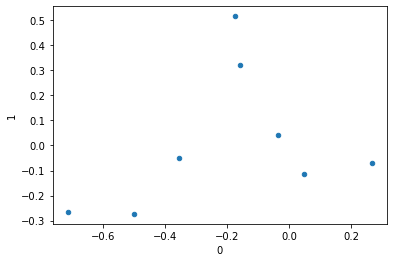

In [5]:
%matplotlib inline

display(ca.row_coordinates(df))
ca.row_coordinates(df).plot.scatter(0, 1);

De manera similar, podemos ver cómo se asignan las columnas en este nuevo espacio.

,0,1
Chemistry,0.058167,0.211959
Economics,0.461605,-0.351199
Literature,-0.789820,-0.185986
Medicine,0.107692,-0.066187
Peace,-0.203421,-0.207777
Physics,-0.004938,0.163765


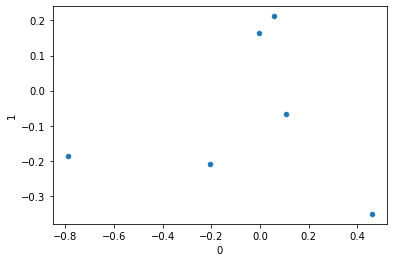

In [6]:
display(ca.column_coordinates(df))
ca.column_coordinates(df).plot.scatter(0, 1);

Pero aún más genial, es muy fácil trazar los dos juntos a través de la función expresiva `plot_coordinates()`. Esto se parece a las imágenes que hemos estado viendo todo el tiempo, simplemente volteadas en un par de ejes.

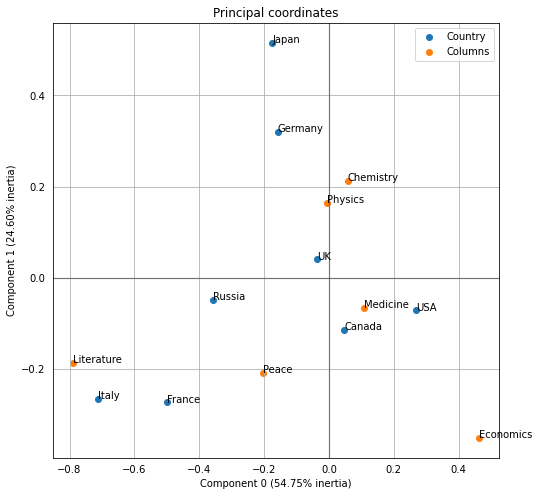

In [7]:
ca.plot_coordinates(df, figsize=(8, 8));

Finalmente, podemos inspeccionar fácilmente las distintas métricas a las que queremos prestar atención.

In [8]:
ca.eigenvalues_

[0.08333122262451494, 0.03744306648476863]

In [9]:
ca.total_inertia_

0.15220911043080823

In [10]:
ca.explained_inertia_

[0.5474785470374058, 0.2459975383785561]

## Referencias

- Greenacre, M., 2017. Correspondence analysis in practice. chapman and hall/crc.
- https://youtu.be/Z5Lo1hvZ9fA

# Ejercicio

El conjunto de datos `funding_research.csv` proviene de una organización de investigación y desarrollo científico que ha clasificado a 796 investigadores científicos en cinco categorías con el fin de asignar fondos de investigación. Los investigadores se clasifican de forma cruzada según su disciplina científica (las 10 filas de la tabla) y la categoría de financiación (las cinco columnas de la tabla). Las categorías están etiquetadas como $A, B, C, D$ y $E$, y están ordenadas de la categoría de financiación más alta a la más baja. En realidad, $A$ a $D$ son las categorías para los investigadores que reciben subvenciones de investigación, desde $A$ (más financiado) a $D$ (menos financiado), mientras que $E$ es una categoría asignada a los investigadores cuyas solicitudes no fueron exitosas (es decir, solicitud de financiamiento rechazada).

In [11]:
df2 = pd.read_csv('funding_research.csv', index_col='scientific_areas')
df2

,A,B,C,D,E
scientific_areas,,,,,
Geology,3,19,39,14,10
Biochemistry,1,2,13,1,12
Chemistry,6,25,49,21,29
Zoology,3,15,41,35,26
Physics,10,22,47,9,26
Engineering,3,11,25,15,34
Microbiology,1,6,14,5,11
Botany,0,12,34,17,23
Statistics,2,5,11,4,7


Para este dataset, realice diversos análisis usando CA. Determine la descomposición de inercia a lo largo de 4 ejes principales. Calcule la inercia en cada eje e interprete. Determine las coordenadas para cada eje y realice gráficas de los perfiles por fila y columna (separado y de forma conjunta). Interprete las gráficas.